In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Housing.csv')
print(data.shape)
data.head()

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Estimated coefficients:
b_0 = 706439.7448764691 
b_1 = 14.534895022519635


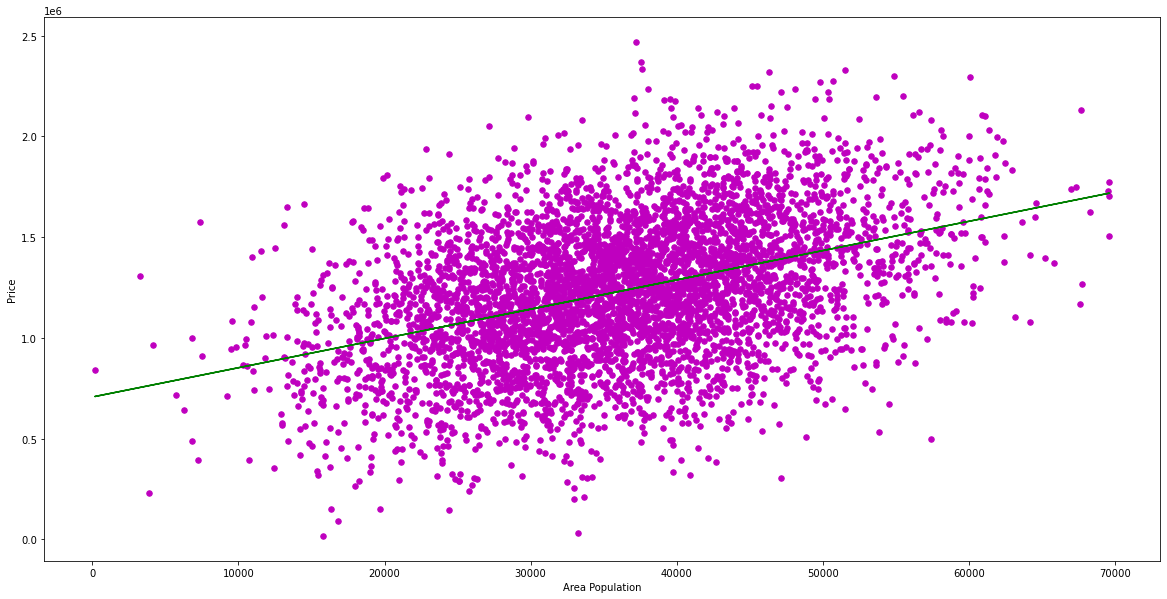

In [4]:
#1st Way -
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('Area Population')
    plt.ylabel('Price')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = data['Area Population'].values
    y = data['Price'].values
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

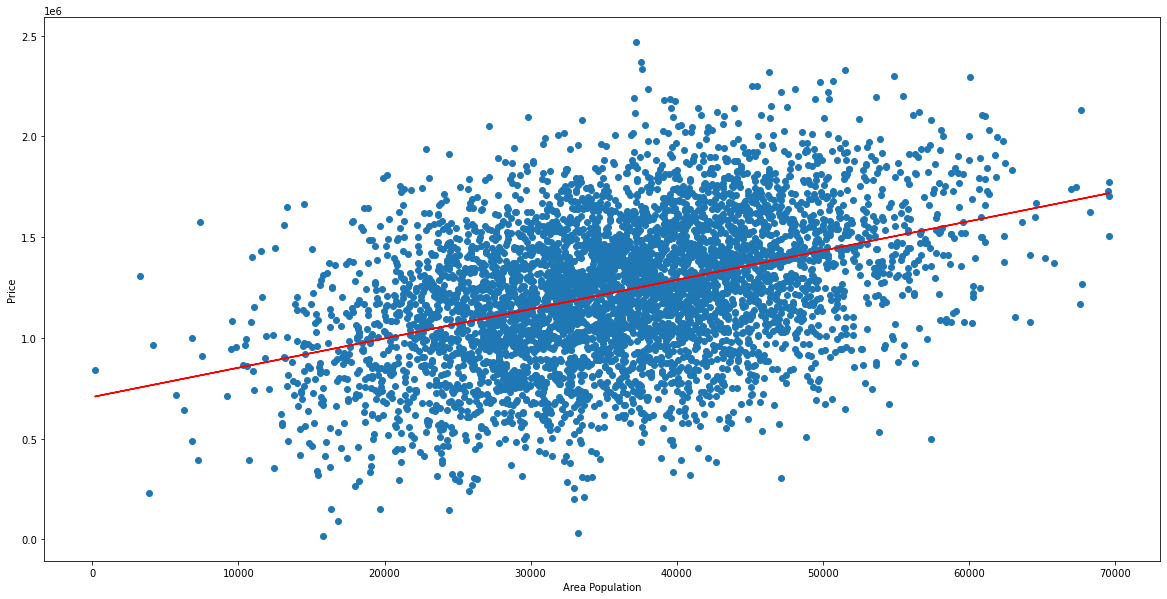

In [9]:
#2nd Way -
X  = data.iloc[:, 4].values.reshape(-1, 1)
Y = data.iloc[:, 5].values.reshape(-1, 1)
lr = LinearRegression()  
lr.fit(X,Y)
Y_pred = lr.predict(X)
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.show()

In [18]:
print(Y_pred)[0:5]

[[1042003.96658887]
 [1290351.1316525 ]
 [1242518.05995501]
 ...
 [1189959.67737243]
 [1325998.65911156]
 [1382331.02336753]]


TypeError: 'NoneType' object is not subscriptable

In [14]:
#R^2 value
lr.score(X,Y)

0.16691790652412453

In [16]:
lr.coef_

array([[14.53489502]])

In [17]:
lr.intercept_

array([706439.74487647])